In [1]:
import os
import nltk
import json
import pickle
import re
import string
import pandas as pd
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

import preprocess
from lemma import LemmatizationWithPOSTagger

 # bla


In [2]:
with open(os.path.join("output.txt"), 'r') as file:
    docs=file.read()
docs=[doc.split('\n') for doc in docs.split('\n\n')]

In [3]:
dict={}
tags_gt=[]
for doc in docs:
    tags=[]
    for line in doc:
        parts = line.split("=")
        word = parts[0].strip().lower()
        if word in string.punctuation and word != "'":
            continue
        form=parts[1].split("+")
        if len(form) <2:
            print(line)
        lemma= form[0].strip().lower()
        tag= form[1].strip().upper()
        if word in dict:
            dict[word][tag]=lemma
        else:
            dict[word]={tag:lemma}
        tags.append((word,tag))
    tags_gt.append(tags)
    #dicts.append(dict)

In [4]:
dict_size=0
for word in dict.items():
    dict_size+=len(word[1])

In [5]:
print('kích thước của dictionary xây dựng từ tập corpus được soạn:',dict_size)

kích thước của dictionary xây dựng từ tập corpus được soạn: 334


In [6]:
with open(os.path.join("corpus.txt"), 'r') as file:
    lines=file.read()
corpus=lines.split('\n')

In [7]:
len(corpus)

40

In [8]:
#Tiền xử lý : -đưa về dạng chữ thường, chuẩn hoán unicode, xóa khoảng trắng dư
pr=preprocess.Preprocessing()
def pipeline(str):
    str = pr.text_lowercase(str)
    str= pr.convert_unicode(str)
    str= pr.remove_whitespace(str)
    return str

In [9]:
corpus_preprocessed= [pipeline(str) for str in corpus]
#Tokenize bằng thư viện nltk và loại bỏ những token là dấu câu
corpus_tokens= [[token for token in word_tokenize(sent) if str(token) not in string.punctuation or str(token) == "'"] for sent in corpus_preprocessed]

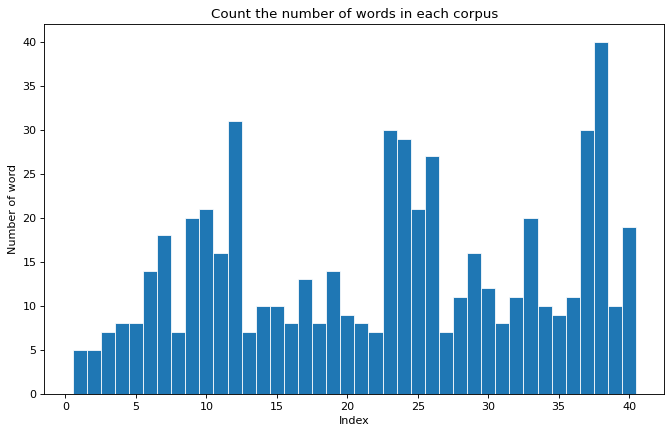

Total word in corpus:  575


In [10]:
numbers = []
for tokens in corpus_tokens:
    numbers.append(len(tokens))
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
ax.set_title('Count the number of words in each corpus')
ax.set_ylabel('Number of word')
ax.set_xlabel('Index')
x = np.arange(1,len(corpus)+1)
y=np.array(numbers)
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.show()
print("Total word in corpus: ",sum(numbers))

In [11]:
lemma= LemmatizationWithPOSTagger(True)
lemma_corpus, pos_tag= lemma.lemmatize(corpus_tokens, word_tokenize='No_tokenize', return_pos=True)

TypeError: LemmatizationWithPOSTagger.lemmatize() got an unexpected keyword argument 'word_tokenize'

In [ ]:
lemma_corpus

In [ ]:
lemma_tokens= [sent.split() for sent in lemma_corpus]

In [ ]:
bla1=[]
bla2=[]
for i in range(len(lemma_tokens)):
    for (w1, w2, tag) in zip(lemma_tokens[i], lemma_tokens1[i], tags_gt[i]):
        if w1 != w2:
            print(w1, w2, dict[tag[0]][tag[1]])
        if w1 != dict[tag[0]][tag[1]]:
            bla1.append(w1)
        if w2 != dict[tag[0]][tag[1]]:
            bla2.append(w2)
            #print(w1, dict[tag[0]][tag[1]])


In [ ]:
bla1

In [ ]:
bla2

In [ ]:
count= 0
wrong_tag=0
true=0
not_exist=0
for i in range(len(corpus)):
    for word, lemma, tag, tag_gt in zip(corpus_tokens[i],lemma_tokens[i], pos_tag[i], tags_gt[i]):
        if word not in dict:
            not_exist+=1
            continue
        #kiểm tra số lượng từ bị gán sai tag
        if tag[1] != tag_gt[1]:
            wrong_tag+=1
            
            #sai tag nhưng từ vẫn được khôi phục về từ gốc đúng            
            if lemma == dict[word][tag_gt[1]]:
                true+=1
            continue
        if dict[word][tag[1]] == lemma:
            count+=1
        else:
            print(dict[word][tag[1]], lemma)

In [ ]:
sum(numbers)

In [ ]:
1 - wrong_tag/sum(numbers)

In [ ]:
not_exist

In [ ]:
(count)/sum(numbers)

In [ ]:
(count+true)/sum(numbers)

In [ ]:
#nltk.download()

# PREPROCESS MUSIC DATA

In [43]:
features=['title', 'id', 'release_date', 'lyrics']

In [44]:
df=pd.DataFrame()
for dirname, _, filenames in os.walk('data\json files'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            aux = json.load(f)
            df_tmp=pd.DataFrame()
            Artist= np.full((len(aux['songs'])), aux['name'])
            df_tmp['artist']=Artist
            for f in features:
                col=[song[f] for song in aux['songs']]
                df_tmp[f]=col
            df=pd.concat([df,df_tmp]).reset_index(drop=True)

In [45]:
df

,artist,title,id,release_date,lyrics
0,Ariana Grande,"​thank u, next",4063065,2018-11-03,[Verse 1]\nThought I'd end up with Sean\nBut h...
1,Ariana Grande,7 rings,4067762,2019-01-18,"[Verse 1]\nYeah, breakfast at Tiffany's and bo..."
2,Ariana Grande,​God is a woman,3681280,2018-07-13,"[Chorus]\nYou, you love it how I move you\nYou..."
3,Ariana Grande,Side To Side,2457495,2016-05-20,[Intro: Ariana Grande & Nicki Minaj]\nI've bee...
4,Ariana Grande,​​no tears left to cry,3649172,2018-04-20,"[Intro]\nRight now, I'm in a state of mind\nI ..."
...,...,...,...,...,...
5853,Taylor Swift,Welcome Back Grunwald,6226864,None,Turn WYCD on\nYou're\nOn your Grunwald\nBack f...
5854,Taylor Swift,Tolerate it (Polskie Tłumaczenie),6315848,2020-12-11,[Zwrotka 1]\nSiedzę i patrzę jak czytasz z gło...
5855,Taylor Swift,Find you,6209316,None,Trying just like they say\nJust taking the ste...
5856,Taylor Swift,Static,6371365,None,*static for 8 seconds*


In [46]:
tmp=[]
tags=['remix', 'unreleased', 'concept', 'leak', 'extended','live','club', 'acoustic',' version', ' ver', 'demo', 'reprise', 'copy', 'mix','edit', 'dub', 'studio', 'record', 'video', 'original', 'radio', 'quotes','reimagined', 'clean', 'demo']
#tags=['song']
for title in df['title']:
    for tag in tags:
        #r=title.find(tag)
        if re.search(f'\[(.*?){tag}(.*?)\]' ,title.lower()) != None:
            tmp.append(title)
        if re.search(f'\((.*?){tag}(.*?)\)' ,title.lower()) != None:
            tmp.append(title)
        if re.search(f"\ {tag}", title.lower()) != None:
            tmp.append(title)

In [47]:
for title in tmp:
    df= df[df.title != title].reset_index(drop=True)

In [48]:
for f in features:
    print("number null value of {}: ".format(f),sum(df[f].isnull()))
    
df.dropna(subset = ["lyrics"], inplace=True)

number null value of title:  0
number null value of id:  0
number null value of release_date:  1345
number null value of lyrics:  7


In [51]:
tmp=[]
for idx, lyric in zip(df.id, df.lyrics):
    #if (len(lyric.split("\n"))<6 and re.search('\[(.*?)\]', lyric)==None) or len(lyric)<100: 
    #if len(lyric.split("\n"))<6 and re.search('\[(.*?)\]', lyric) is None:
        #tmp.append(lyric)
    if len(lyric)<100:
        tmp.append(lyric)

In [53]:
df.dropna(subset = ["lyrics"], inplace=True)
tmp=[]
for idx,lyric in zip(df.id, df.lyrics):
    if (len(lyric.split("\n"))<6 and re.search('\[(.*?)\]', lyric)==None) or len(lyric)<100: 
        tmp.append(idx)
for i in tmp:
    df=df[df.id!=i]
df=df.reset_index(drop=True)

# Preprocessing

In [100]:
clean= preprocess.Preprocessing(Pipeline=['lemmatizer','nltk_word_tokenizer'])

In [101]:
from tqdm import tqdm
lyrics=np.array([])
for lyric in tqdm(df.lyrics):
    lyrics=np.append(lyrics,clean.Preprocess(lyric))

100%|██████████████████████████████████████████████████████████████████████████████| 3759/3759 [06:38<00:00,  9.44it/s]


In [102]:
tokenize_lyric=[]
from tqdm import tqdm
for lyric in tqdm(lyrics):
    tokenize_lyric.append(lyric.split())


100%|███████████████████████████████████████████████████████████████████████████| 3759/3759 [00:00<00:00, 13358.38it/s]


In [103]:
for i in range(len(df.id)):
    tokenize_lyric[i].append(f"-->{df.id[i]}")

In [ ]:
tokenize_lyric

In [104]:
from rank_bm25 import BM25Okapi, BM25Plus

In [105]:
bm25 = BM25Plus(tokenize_lyric)

In [106]:
def bm25okapi_search(tokenized_query, bm25, corpus, n_results = 1):
    """
    Function that takes a tokenized query and prints the first 100 words of the 
    n_results most relevant results found in the corpus, based on the BM25
    method.
    
    Parameters
    ----------
    @param tokenized_query: list, array-like
        A valid list containing the tokenized query.
    @param bm25: BM25 object,
        A valid object of type BM25 (BM25Okapi or BM25Plus) from the library
        `rank-bm25`, initialized with a valid corpus.
    @param corpus: list, array-like
        A valid list containing the corpus from which the BM25 object has been 
        initialized. As returned from function read_corpus().
    @param n_results: int, default = 1
        The number of top results to print.
    """
    # Get top results for the query
    top_results = bm25.get_top_n(tokenized_query, corpus, n = n_results)
    # Take words from each result
    top_results_id = [int(' '.join(top_result).split("-->")[-1]) 
                             for top_result in top_results]
    
    # Return results
    return top_results_id

In [107]:
corpus= "Now I listn and laugh... Ad for tht, I say"
corpus=corpus.replace('...',' ')
corpus=clean.Preprocess(corpus)
corpus=[corpus.split(" ")]

In [108]:
corpus

[['now', 'i', 'listn', 'and', 'laugh', 'ad', 'for', 'tht', 'i', 'say']]

In [109]:
rank=bm25okapi_search(corpus[0], bm25, tokenize_lyric, n_results= 5)

In [110]:
df[df.id.isin(rank)].reset_index(drop=True)

,artist,title,id,release_date,lyrics
0,Eminem,The Sauce,2046,2002-11-21,"[Intro]\nIt's all bad now, man, it's all bad\n..."
1,Katy Perry,Sex Sells,3776346,None,[Verse 1]\nI will not philosophize about the m...
2,Nicki Minaj,Roman Reloaded,66564,2012-02-24,"[Chorus: Nicki Minaj]\nBang, my shit bang, it ..."
3,Rihanna,What Now,97998,2013-08-29,[Verse 1]\nI've been ignoring this big lump in...
4,Taylor Swift,​tolerate it,6260164,2020-12-11,[Verse 1]\nI sit and watch you reading with yo...


In [111]:
test_query=pd.read_csv('test.csv')
test_query['qid']=test_query.index +1

In [112]:
test_query

,corpus,id,artist,title,qid
0,"Now I listn and laugh... Ad for tht, I say",4063065,Ariana Grande,"​thank u, next",1
1,"I see it, I like it, I want it, I got it",4067762,Ariana Grande,7 rings,2
2,I keep on flourish...feelig that you can't figh,3681280,Ariana Grande,​God is a woman,3
3,"You take my cares away...over-complicate,... M...",3681287,Ariana Grande,​​breathin,4
4,"Painted a picture...They see demon, I see angel",4114857,Ariana Grande,​in my head,5
...,...,...,...,...,...
95,pink and purple in the sky,4705721,Katy Perry,Harleys In Hawaii,96
96,Open up your heart,239156,Katy Perry,Unconditionally,97
97,"Yeah, I am born again...I'm wide awake",83607,Katy Perry,Wide Awake,98
98,Silver Lake... rose,239162,Katy Perry,This is How We Do,99


In [90]:
query_token=[]
for _, row in test_query.iterrows(): 
    query=row['corpus'].replace('...',' ')
    query=clean.Preprocess(query)
    query=query.split(" ")
    query_token.append(query)
    
    

In [113]:
query_token=[]
for _, row in test_query.iterrows(): 
    query=row['corpus'].replace('...',' ')
    query=clean.Preprocess(query)
    query=query.split(" ")
    query_token.append(query)
    

test_query['query_token']= query_token

def search(query_df, ir_model, tokenize_lyric, n_results= 5):
    #return result dataframe
    search_results= pd.DataFrame()
    for i, query in query_df.iterrows():
        #return relevance lyric_id rank array
        lyrics_id=bm25okapi_search(query['query_token'], ir_model, tokenize_lyric, n_results)
        for rank,lyric_id in enumerate(lyrics_id):
            search_results=search_results.append({'rank': rank+1,
                                                 'id': lyric_id,
                                                 'qid': query['qid']}, ignore_index=True)
    return search_results

In [114]:
test_query

,corpus,id,artist,title,qid,query_token
0,"Now I listn and laugh... Ad for tht, I say",4063065,Ariana Grande,"​thank u, next",1,"[now, i, listn, and, laugh, ad, for, tht, i, say]"
1,"I see it, I like it, I want it, I got it",4067762,Ariana Grande,7 rings,2,"[i, see, it, i, like, it, i, want, it, i, got,..."
2,I keep on flourish...feelig that you can't figh,3681280,Ariana Grande,​God is a woman,3,"[i, keep, on, flourish, feelig, that, you, can..."
3,"You take my cares away...over-complicate,... M...",3681287,Ariana Grande,​​breathin,4,"[you, take, my, care, away, overcomplicate, me..."
4,"Painted a picture...They see demon, I see angel",4114857,Ariana Grande,​in my head,5,"[paint, a, picture, they, see, demon, i, see, ..."
...,...,...,...,...,...,...
95,pink and purple in the sky,4705721,Katy Perry,Harleys In Hawaii,96,"[pink, and, purple, in, the, sky]"
96,Open up your heart,239156,Katy Perry,Unconditionally,97,"[open, up, your, heart]"
97,"Yeah, I am born again...I'm wide awake",83607,Katy Perry,Wide Awake,98,"[yeah, i, be, bear, again, i, be, wide, awake]"
98,Silver Lake... rose,239162,Katy Perry,This is How We Do,99,"[silver, lake, rise]"


In [158]:
search_results=search(test_query, bm25, tokenize_lyric, 100)

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_results.append({'rank': rank+1,
C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1380594941.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  search_results=search_resu

In [159]:
judgments= test_query[['qid','id']]
judgments['relevancy grade']= 1

C:\Users\hoang\AppData\Local\Temp\ipykernel_14512\1620938725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgments['relevancy grade']= 1


In [160]:
judgments

,qid,id,relevancy grade
0,1,4063065,1
1,2,4067762,1
2,3,3681280,1
3,4,3681287,1
4,5,4114857,1
...,...,...,...
95,96,4705721,1
96,97,239156,1
97,98,83607,1
98,99,239162,1


In [161]:
labeled_search_results = search_results.merge(judgments, how='left', on=['qid', 'id']).fillna(0)
labeled_search_results.head(20)

,rank,id,qid,relevancy grade
0,1,66564,1,0.0
1,2,6260164,1,0.0
2,3,2046,1,0.0
3,4,3776346,1,0.0
4,5,97998,1,0.0
5,6,1026515,1,0.0
6,7,5865445,1,0.0
7,8,3913239,1,0.0
8,9,3807748,1,0.0
9,10,186987,1,0.0


In [162]:
relevances_rank = labeled_search_results.groupby(['qid', 'relevancy grade'])['rank'].min()

In [163]:
relevances_rank

qid  relevancy grade
1    0.0                 1
     1.0                41
2    0.0                 2
     1.0                 1
3    0.0                 2
                        ..
98   1.0                 1
99   0.0                 1
     1.0                 8
100  0.0                 2
     1.0                 1
Name: rank, Length: 196, dtype: int64

In [164]:
#Calculate evaluate Score as Mean Reciprocal Rank (MRR) metric
ranks = relevances_rank.loc[:, 1]
reciprocal_ranks = 1 / (ranks)
reciprocal_ranks.sum()/len(judgments)

0.7589096533547753

In [165]:
ranks

qid
1      41
2       1
3       1
4       1
5       1
       ..
96      2
97      2
98      1
99      8
100     1
Name: rank, Length: 96, dtype: int64